# Proposta

A distribuidora de vinhos **JackWine** decidiu expandir seus horizontes e agora está importando vinhos tintos e branco portugueses, mais especificamente a marca "Vinho Verde", que fará sua carta de vinhos se tornar mais vasta aqui no Brasil.

* link do dataset: https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv

#### Objetivos principais para alcançar os objetivos da JackWine:

1. Quais é a Distribuição das co-variáveis por qualidade do vinho?

2. Qual é a Relação entre as co-variáveis e teor alcóolico?

3. Qual a acidez volátil média dos vinhos de qualidade elevada?

4. Qual a relação entre teor alcóolico e qualidade do vinho?

5. Existe alguma relação entre acidez volátil e teor alcóolico?
    
6. Existe alguma relação entre acidez volátil e qualidade do vinho?

In [72]:
import sys # Fornece acesso a variáveis e funções do sistema Python
import os # fornece interface com o sitema operacional
import pandas as pd
import numpy as np

# Caminho absoluto para a pasta do projeto (nível acima de 'src')
project_root = os.path.abspath("..")

if project_root not in sys.path:
    sys.path.append(project_root)

# Importa Classes de objetos
from src.etl.extract import extract_csv_processed
from src.etl.stats import calcula_skew_kurtosis, obter_dados_nulos, detecta_outliers_iqr, matrix_correlacao, analisar_distribuicao
from src.etl.transform import remove_duplicates
from src.features.outliers import cap_outliers, detect_outliers
from src.features.balancing import balance_dataframe
from src.visualization.graficos import grafo_barra, grafo_heatmap, grafo_scatterplot, grafo_boxplot, grafo_distribuicao, grafo_bloco_boxplot, grafo_dist_boxplot

from src.config import DATA_PROCESSED

#### Consumimos os dados através do arquivo raw(puro), que foi obtido pelo site [kaggle](https://www.kaggle.com/datasets/yasserh/wine-quality-dataset)

In [177]:
# Extrai dados processados
input_path = 'arquivos_exploratorio.csv'

df = extract_csv_processed(input_path)
df.sort_values('qualidade')

,acidez_fixa,acidez_volatil,acido_citrico,acucar_residual,cloretos,dioxido_enxofre_livre,dioxido_enxofre_total,densidade,ph,sulfitos,alcool,qualidade
690,7.4,1.185,0.00,4.25,0.097,5.0,14.0,0.99660,3.63,0.54,10.7,3
832,10.4,0.440,0.42,1.50,0.145,34.0,48.0,0.99832,3.38,0.86,9.9,3
517,10.4,0.610,0.49,2.10,0.200,5.0,16.0,0.99940,3.16,0.63,8.4,3
899,8.3,1.020,0.02,3.40,0.084,6.0,11.0,0.99892,3.48,0.49,11.0,3
459,11.6,0.580,0.66,2.20,0.074,10.0,47.0,1.00080,3.25,0.57,9.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
1090,10.0,0.260,0.54,1.90,0.083,42.0,74.0,0.99451,2.98,0.63,11.8,8
1120,7.9,0.540,0.34,2.50,0.076,8.0,17.0,0.99235,3.20,0.72,13.1,8
588,5.0,0.420,0.24,2.00,0.060,19.0,50.0,0.99170,3.72,0.74,14.0,8
828,7.8,0.570,0.09,2.30,0.065,34.0,45.0,0.99417,3.46,0.74,12.7,8


# Análise Exploratória (EDA)

In [43]:
# Shape
df.shape

(1599, 12)

In [44]:
#informação do dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   acidez_fixa            1599 non-null   float64
 1   acidez_volatil         1599 non-null   float64
 2   acido_citrico          1599 non-null   float64
 3   acucar_residual        1599 non-null   float64
 4   cloretos               1599 non-null   float64
 5   dioxido_enxofre_livre  1599 non-null   float64
 6   dioxido_enxofre_total  1599 non-null   float64
 7   densidade              1599 non-null   float64
 8   ph                     1599 non-null   float64
 9   sulfitos               1599 non-null   float64
 10  alcool                 1599 non-null   float64
 11  qualidade              1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [45]:
# Dados Nulos
df.isnull().sum()

acidez_fixa              0
acidez_volatil           0
acido_citrico            0
acucar_residual          0
cloretos                 0
dioxido_enxofre_livre    0
dioxido_enxofre_total    0
densidade                0
ph                       0
sulfitos                 0
alcool                   0
qualidade                0
dtype: int64

In [46]:
# Estatística Básica do Dataframe
df.describe()

,acidez_fixa,acidez_volatil,acido_citrico,acucar_residual,cloretos,dioxido_enxofre_livre,dioxido_enxofre_total,densidade,ph,sulfitos,alcool,qualidade
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


#### Observando as estatísticas básicas de cada variável, percebemos um baixa dispersão nos dados devido ao seu desvio padrão baixo, se destacando entre eles o dioxido de carbono livre e total com um desvio padrão mais alto assim tendo um dispersão maior, podendo causar uma alta variabilidade, fazendo a com que o dioxido de enxofre fique bem maior ou menor que a média.
#### Isso pode impactar na qualidade da generalização dos nossos dados, sendo assim quando formos trabalhar com os modelos irei padronizar os valores dos dados para que não perdamos a generalização dos nossos dados na hora de fazer o seu treinamento e testes.

In [47]:
# Obseva dados duplicados
remove_duplicates(df)

🔄 Duplicatas removidas: 240
📊 Linhas: 1599 → 1359


,acidez_fixa,acidez_volatil,acido_citrico,acucar_residual,cloretos,dioxido_enxofre_livre,dioxido_enxofre_total,densidade,ph,sulfitos,alcool,qualidade
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


#### Os dados duplicados existentes nesse DataFrame especificamente são comuns, pois para se obter resultados de qualidade do vinho esses resultados precisarão ter seu indicadores de qualidade com resultados parecidos ou mesmo iguais.

# Plotagem do gráficos


📊 Análise da coluna: acidez_fixa


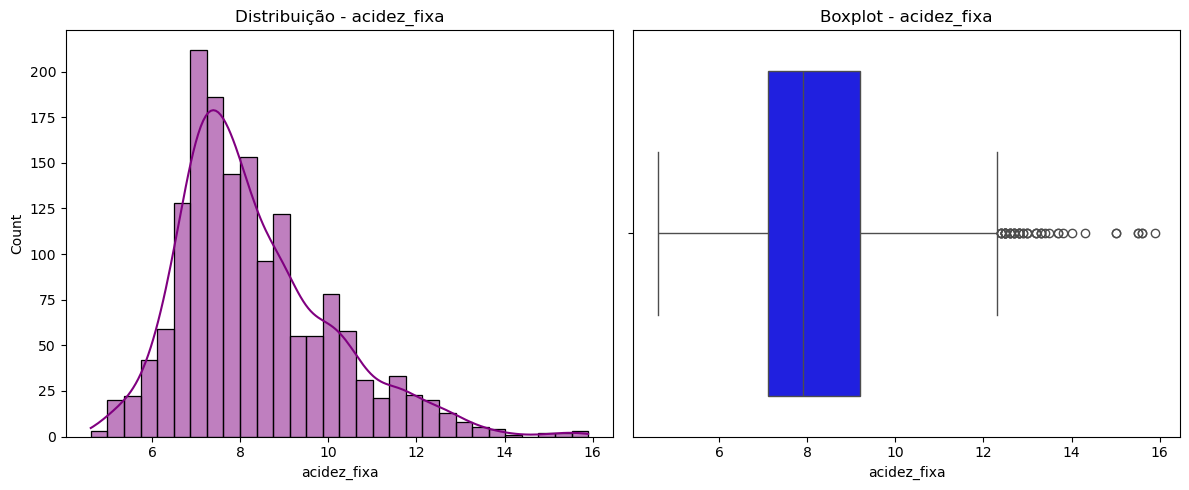


📊 Análise da coluna: acidez_volatil


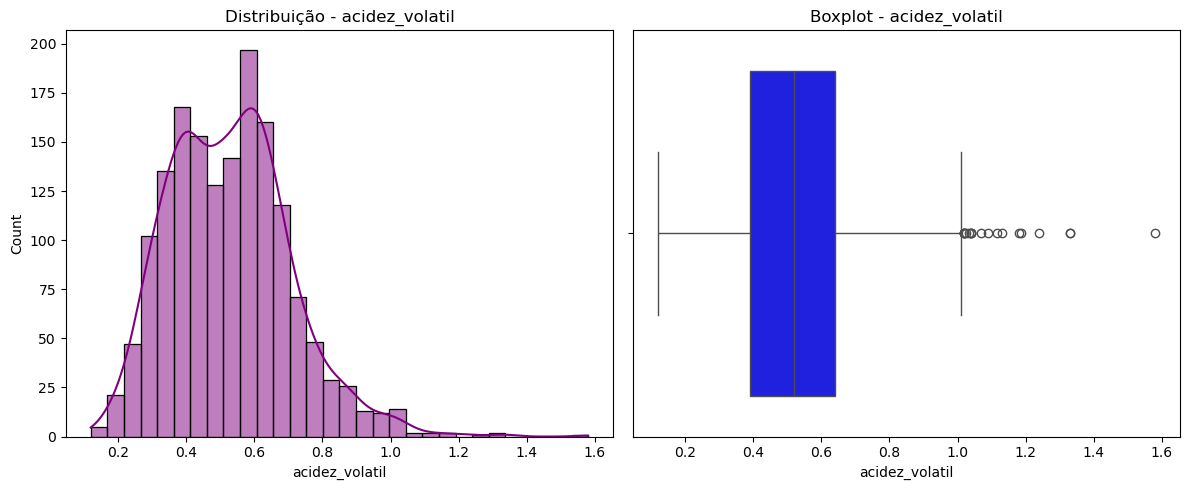


📊 Análise da coluna: acido_citrico


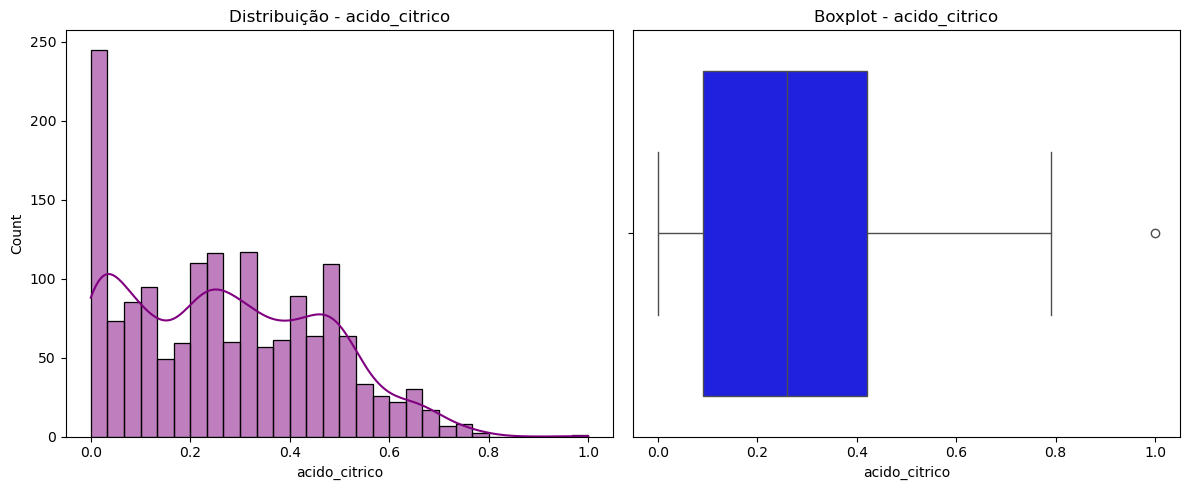


📊 Análise da coluna: acucar_residual


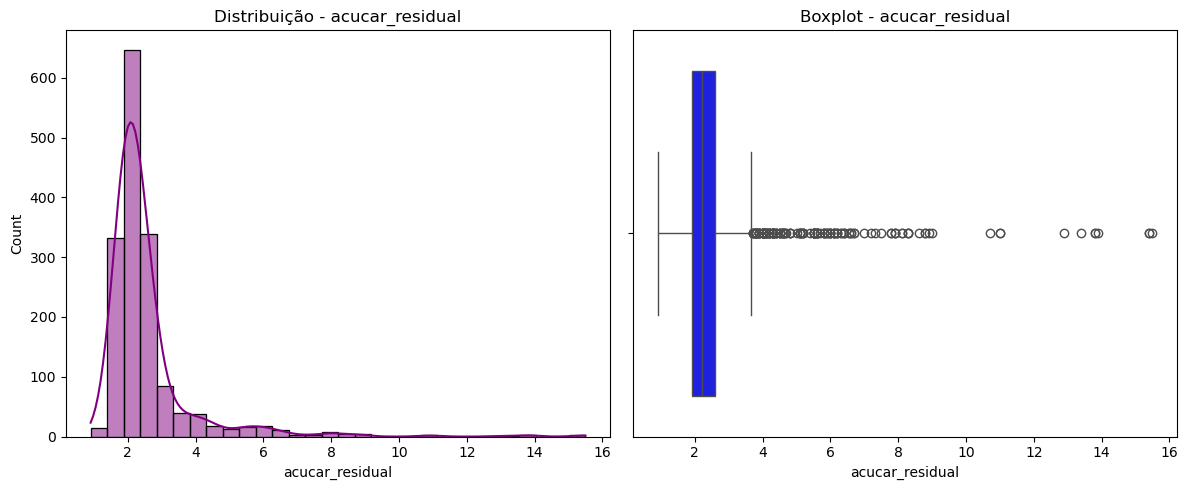


📊 Análise da coluna: cloretos


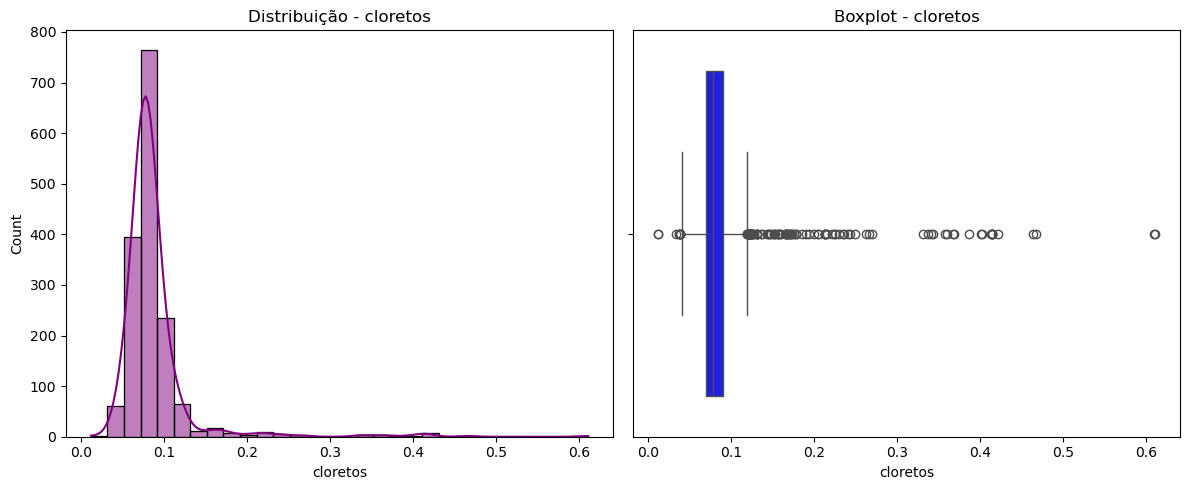


📊 Análise da coluna: dioxido_enxofre_livre


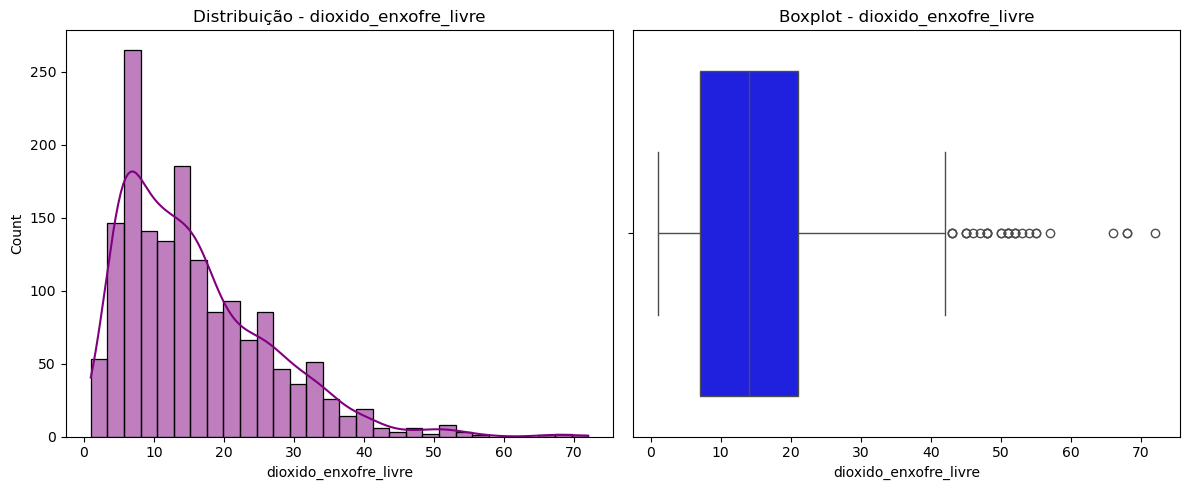


📊 Análise da coluna: dioxido_enxofre_total


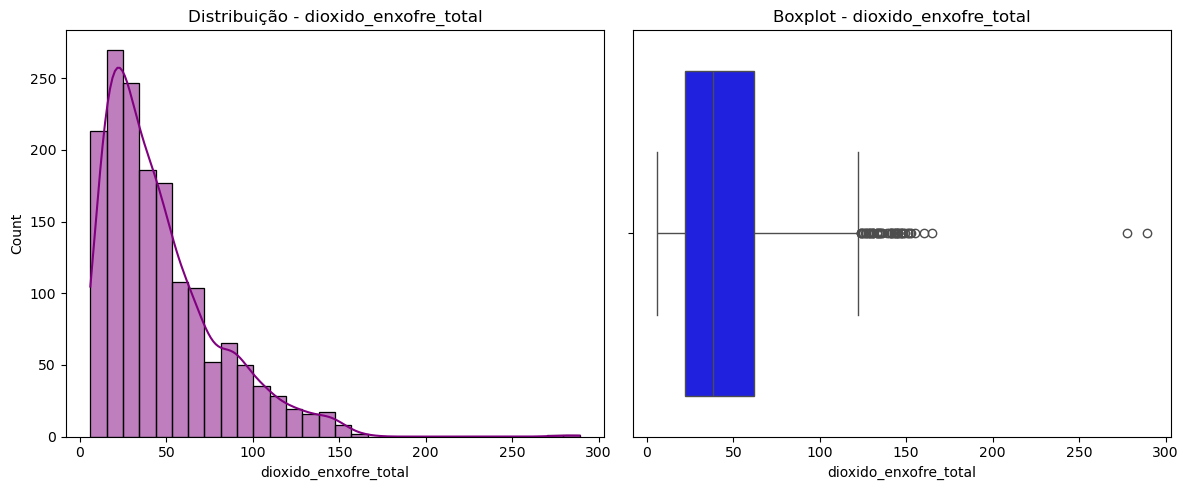


📊 Análise da coluna: densidade


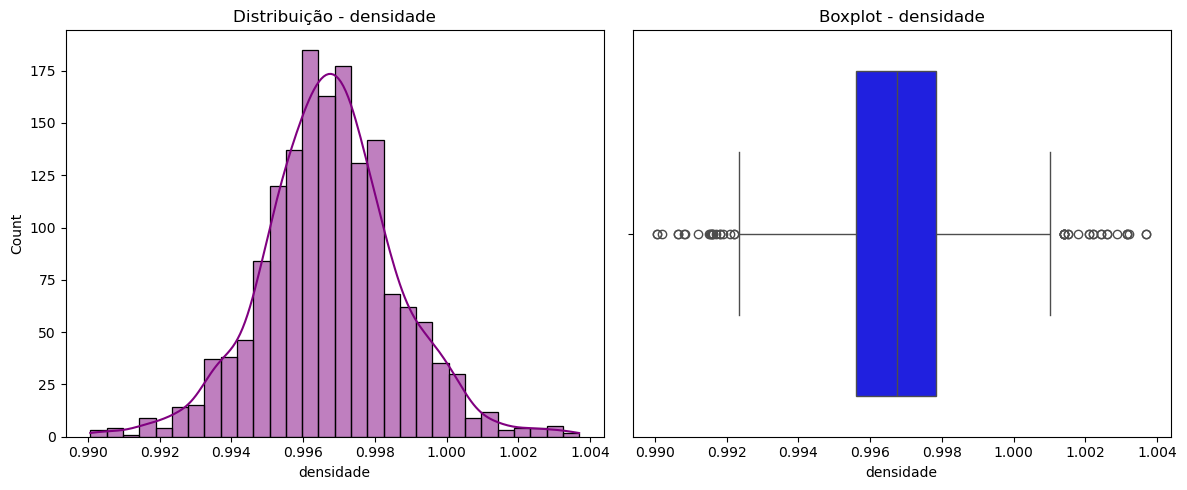


📊 Análise da coluna: ph


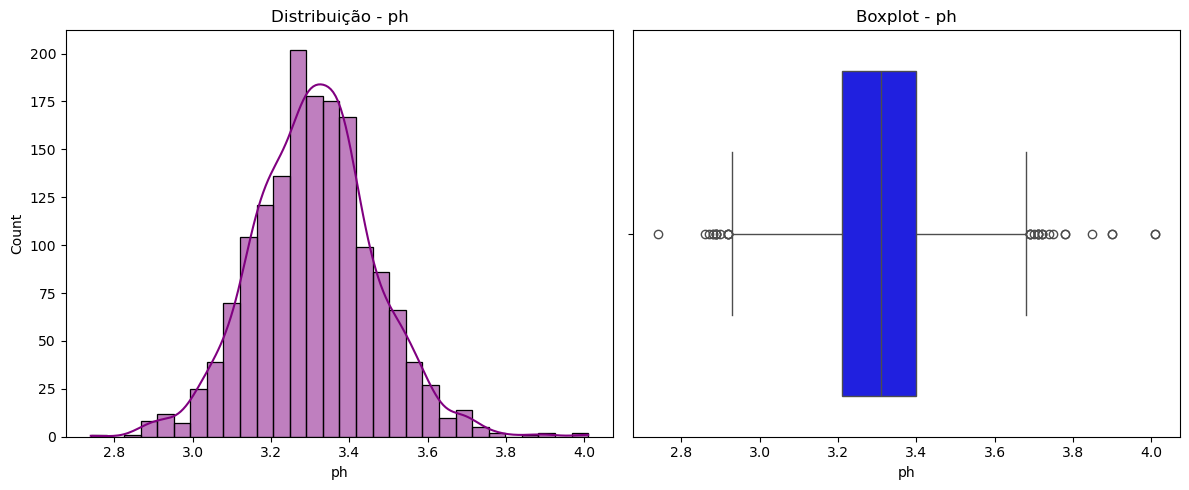


📊 Análise da coluna: sulfitos


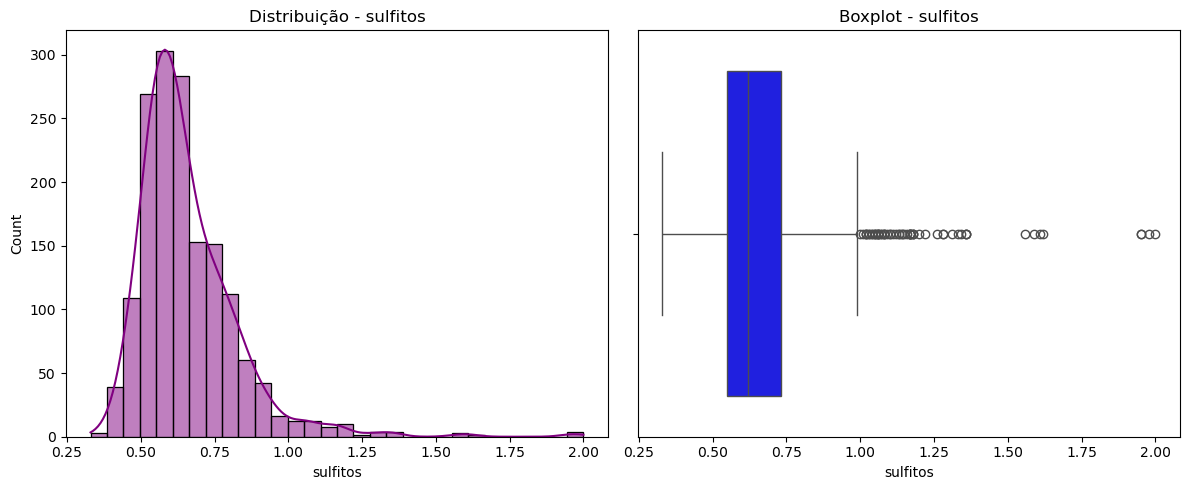


📊 Análise da coluna: alcool


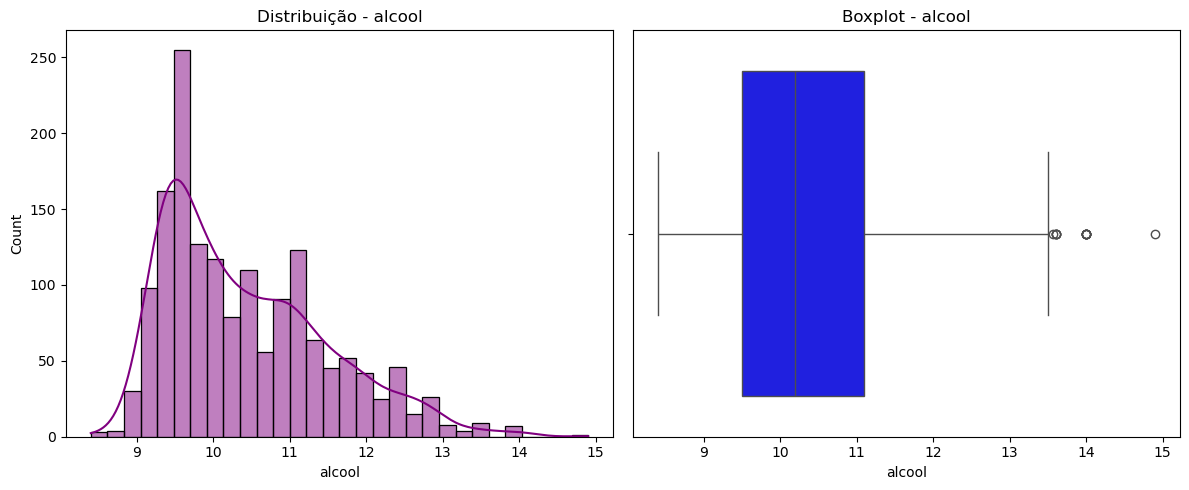


📊 Análise da coluna: qualidade


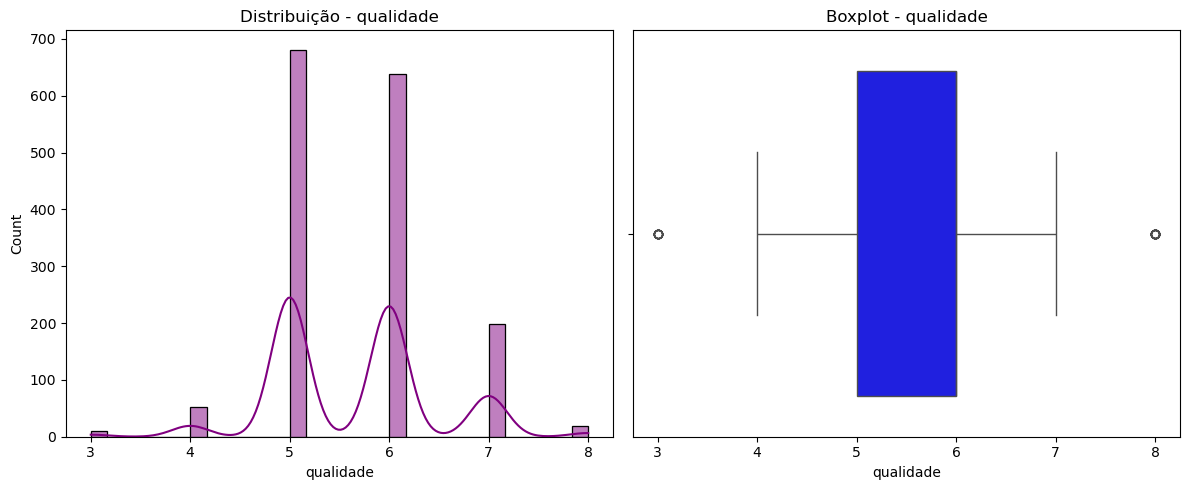

In [75]:
# Gráfico de distribuição e boxplot
colunas = ['acidez_fixa', 'acidez_volatil', 'acido_citrico', 'acucar_residual',
       'cloretos', 'dioxido_enxofre_livre', 'dioxido_enxofre_total',
       'densidade', 'ph', 'sulfitos', 'alcool', 'qualidade']
grafo_dist_boxplot(df, colunas)

#### Detecta Outlier do DataSet

In [80]:
# Função de detectação de ouliers
detect_outliers(df=df)

,coluna,outliers_count,outliers_percentage,lower_limit,upper_limit,min_value,max_value
0,acidez_fixa,49,3.064415,3.950000,12.350000,4.60000,15.90000
1,acidez_volatil,19,1.188243,0.015000,1.015000,0.12000,1.58000
2,acido_citrico,1,0.062539,-0.405000,0.915000,0.00000,1.00000
3,acucar_residual,155,9.693558,0.850000,3.650000,0.90000,15.50000
4,cloretos,112,7.004378,0.040000,0.120000,0.01200,0.61100
5,dioxido_enxofre_livre,30,1.876173,-14.000000,42.000000,1.00000,72.00000
6,dioxido_enxofre_total,55,3.439650,-38.000000,122.000000,6.00000,289.00000
7,densidade,45,2.814259,0.992248,1.001187,0.99007,1.00369
8,ph,35,2.188868,2.925000,3.685000,2.74000,4.01000
9,sulfitos,59,3.689806,0.280000,1.000000,0.33000,2.00000


In [ ]:
# Utilizar colunas para não infuência na variável resposta
cols_cap = ['acidez_fixa', 'acidez_volatil', 'acido_citrico', 'acucar_residual',
       'cloretos', 'dioxido_enxofre_livre', 'dioxido_enxofre_total',
       'densidade', 'ph', 'sulfitos', 'alcool']

In [180]:
# Utilizando o capping para todos os outliers seres considerados valores extremos dentro do range
df = cap_outliers(df, columns=cols_cap)

=== RELATÓRIO DE TRATAMENTO DE OUTLIERS ===
🔧 acidez_fixa:
   Outliers tratados: 49 (3.06%)
   Limites: [3.95, 12.35]
🔧 acidez_volatil:
   Outliers tratados: 19 (1.19%)
   Limites: [0.02, 1.02]
🔧 acido_citrico:
   Outliers tratados: 1 (0.06%)
   Limites: [-0.40, 0.91]
🔧 acucar_residual:
   Outliers tratados: 155 (9.69%)
   Limites: [0.85, 3.65]
🔧 cloretos:
   Outliers tratados: 112 (7.00%)
   Limites: [0.04, 0.12]
🔧 dioxido_enxofre_livre:
   Outliers tratados: 30 (1.88%)
   Limites: [-14.00, 42.00]
🔧 dioxido_enxofre_total:
   Outliers tratados: 55 (3.44%)
   Limites: [-38.00, 122.00]
🔧 densidade:
   Outliers tratados: 45 (2.81%)
   Limites: [0.99, 1.00]
🔧 ph:
   Outliers tratados: 35 (2.19%)
   Limites: [2.92, 3.68]
🔧 sulfitos:
   Outliers tratados: 59 (3.69%)
   Limites: [0.28, 1.00]
🔧 alcool:
   Outliers tratados: 13 (0.81%)
   Limites: [7.10, 13.50]


In [181]:
df.sort_values('qualidade')

,acidez_fixa,acidez_volatil,acido_citrico,acucar_residual,cloretos,dioxido_enxofre_livre,dioxido_enxofre_total,densidade,ph,sulfitos,alcool,qualidade
690,7.4,1.015,0.00,3.65,0.097,5.0,14.0,0.996600,3.630,0.54,10.7,3
832,10.4,0.440,0.42,1.50,0.120,34.0,48.0,0.998320,3.380,0.86,9.9,3
517,10.4,0.610,0.49,2.10,0.120,5.0,16.0,0.999400,3.160,0.63,8.4,3
899,8.3,1.015,0.02,3.40,0.084,6.0,11.0,0.998920,3.480,0.49,11.0,3
459,11.6,0.580,0.66,2.20,0.074,10.0,47.0,1.000800,3.250,0.57,9.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...
1090,10.0,0.260,0.54,1.90,0.083,42.0,74.0,0.994510,2.980,0.63,11.8,8
1120,7.9,0.540,0.34,2.50,0.076,8.0,17.0,0.992350,3.200,0.72,13.1,8
588,5.0,0.420,0.24,2.00,0.060,19.0,50.0,0.992248,3.685,0.74,13.5,8
828,7.8,0.570,0.09,2.30,0.065,34.0,45.0,0.994170,3.460,0.74,12.7,8


#### Ao gerar os gráficos de distribuição e boxplot, conseguimos observar, que não ocorre uma distribuição normal nos dados e também temos outliers no IQR e zscore de nosso dataset, decidi por manter o outliers IQR utilizando a técnica de capping para deixar nosso dataset dentro dos limites do outliers assim teremos dados menos dispersos nos ajudando a obtermos melhores resultados nos modelos de machine learning nos como logistic regression e SVM irei aplicar padronização pelo motivo que eles são muito sensivel a váriações à escala.

#### Confirma se ocorre distribuição normal nas variáveis independentes após o tratamento dos outliers (ph e densidade)

In [183]:
# Observa distribuição normal no ph
analisar_distribuicao(df, 'ph')

📊 Análise da coluna: **ph**

📈 Assimetria: 0.0540 (positiva)
📉 Curtose: -0.0099 (platicúrtica)

🧪 Teste de Shapiro-Wilk:
   Estatística: 0.9943
   p-valor: 0.0574 → ✅ Normal

🧪 Teste de D’Agostino-Pearson:
   Estatística: 0.7823
   p-valor: 0.6763 → ✅ Normal


In [184]:
# Observa distribuição normal na densidade
analisar_distribuicao(df, 'densidade')

📊 Análise da coluna: **densidade**

📈 Assimetria: 0.0250 (positiva)
📉 Curtose: 0.0805 (leptocúrtica)

🧪 Teste de Shapiro-Wilk:
   Estatística: 0.9901
   p-valor: 0.0019 → ❌ Não normal

🧪 Teste de D’Agostino-Pearson:
   Estatística: 0.6969
   p-valor: 0.7058 → ✅ Normal


#### Observa correlação entre as variávies

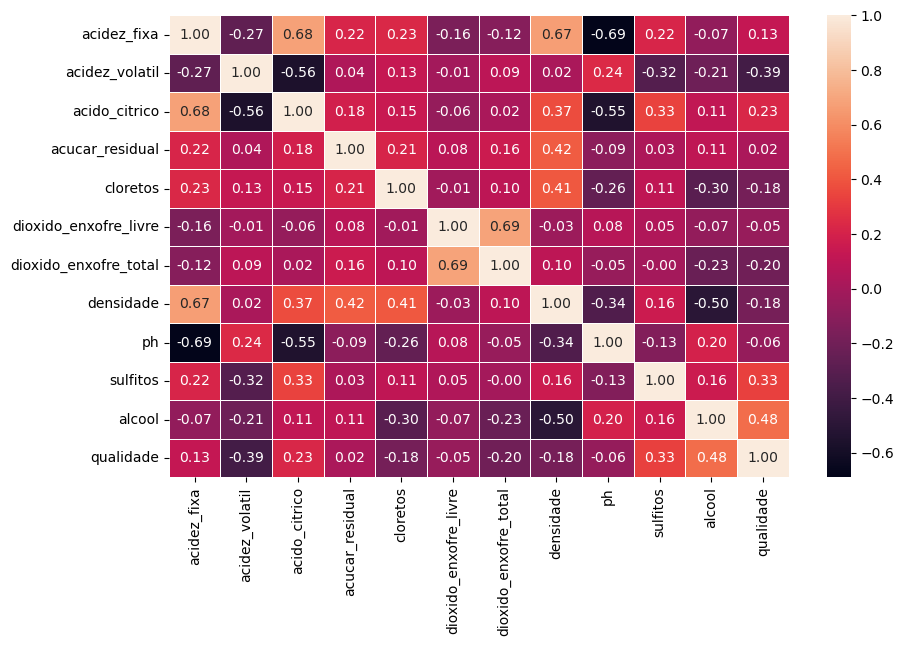

In [185]:
# Correlação das variáveis
grafo_heatmap(df)

#### Média de acidez volátil dos vinhos de qualidade elevada

In [186]:
# Filtra qualidade do vinho acima de 6
df_filtrado = df[df['qualidade'] > 6]
df_filtrado

,acidez_fixa,acidez_volatil,acido_citrico,acucar_residual,cloretos,dioxido_enxofre_livre,dioxido_enxofre_total,densidade,ph,sulfitos,alcool,qualidade
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.00,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.50,7
16,8.5,0.28,0.56,1.8,0.092,35.0,103.0,0.99690,3.30,0.75,10.50,7
37,8.1,0.38,0.28,2.1,0.066,13.0,30.0,0.99680,3.23,0.73,9.70,7
62,7.5,0.52,0.16,1.9,0.085,12.0,35.0,0.99680,3.38,0.62,9.50,7
...,...,...,...,...,...,...,...,...,...,...,...,...
1541,7.4,0.25,0.29,2.2,0.054,19.0,49.0,0.99666,3.40,0.76,10.90,7
1544,8.4,0.37,0.43,2.3,0.063,12.0,19.0,0.99550,3.17,0.81,11.20,7
1549,7.4,0.36,0.30,1.8,0.074,17.0,24.0,0.99419,3.24,0.70,11.40,8
1555,7.0,0.56,0.17,1.7,0.065,15.0,24.0,0.99514,3.44,0.68,10.55,7


In [187]:
# Média de acidez volátil / qualidade
media_acidez_qualidade = pd.DataFrame(df_filtrado.groupby('qualidade')['acidez_volatil'].mean())
media_acidez_qualidade

,acidez_volatil
qualidade,
7,0.403920
8,0.423333


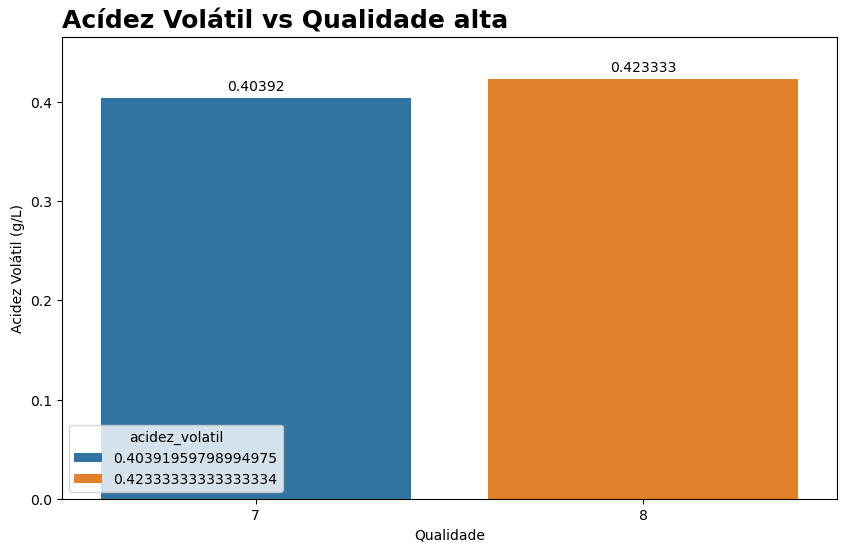

In [188]:
# Gráfico de barra Acídez Volátil / Qualidade do Vinho
grafo_barra(media_acidez_qualidade, media_acidez_qualidade.index, media_acidez_qualidade['acidez_volatil'], media_acidez_qualidade['acidez_volatil'], titulo='Acídez Volátil vs Qualidade alta', ylabel='Acidez Volátil (g/L)', xlabel='Qualidade')

#### A média entre acidez volátil vs qualidade estão próximas nos vinhos de alta qualidade, nos mostrando que para alcançar a qualidade necessária o ideal é fica entre essas médias, mas não descartando os outros componentes de preparação do vinho.

#### relação entre teor alcóolico e qualidade do vinho

In [189]:
# Média de alcool / qualidade
media_alcool_qualidade = pd.DataFrame(df.groupby('qualidade')['alcool'].mean())
media_alcool_qualidade

,alcool
qualidade,
3,9.955000
4,10.265094
5,9.897651
6,10.626228
7,11.461558
8,12.038889


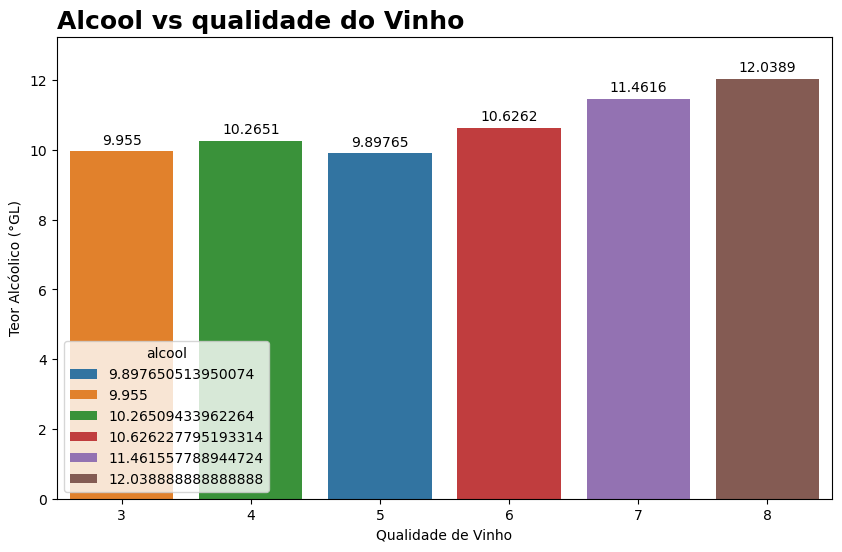

In [190]:
# Gráfico de barra alcool / Qualidade do Vinho 0.48 de correlação
grafo_barra(media_alcool_qualidade, media_alcool_qualidade.index, media_alcool_qualidade['alcool'], media_alcool_qualidade['alcool'],titulo='Alcool vs qualidade do Vinho', ylabel='Teor Alcóolico (°GL)', xlabel='Qualidade de Vinho')

#### A relação entre o teor alcóolico vs qualidade do vinho conforme o gráfico indica são diretamente proporcional, sendo que quanto maior o teor alcóolico maior a qualidade, o wikipedia relata que o teor alcóolico não pode indicar a qualidade do vinho, e que o seu ideal é ficar abaixo de 13% para o vinho mantenha um equilibrio no paladar e tenda a ter corpo mais leve e mais refrescante na boca, a legislação brasileira considera que para ser considerado vinho, tem que ficar acima de 7% de alcool.

#### relação entre sulfatos e qualidade do vinho

In [191]:
# Média de sulfato / qualidade
media_sulfato_qualidade = pd.DataFrame(df.groupby('qualidade')['sulfitos'].mean())
media_sulfato_qualidade

,sulfitos
qualidade,
3,0.570000
4,0.573774
5,0.611219
6,0.668245
7,0.737035
8,0.762222


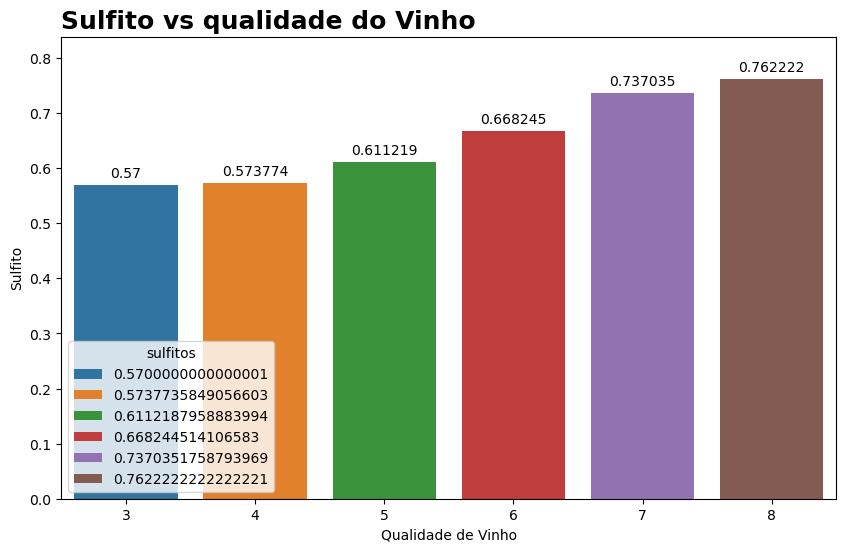

In [192]:
# Gráfico de barra Sulfato / Qualidade do Vinho 0.25 de correlação
grafo_barra(media_sulfato_qualidade, media_sulfato_qualidade.index, media_sulfato_qualidade['sulfitos'], media_sulfato_qualidade['sulfitos'],titulo='Sulfito vs qualidade do Vinho', ylabel='Sulfito', xlabel='Qualidade de Vinho')

#### relação entre ácido cítrico e qualidade do vinho

In [193]:
# Média de Ácido Cítrico / qualidade
media_citrico_qualidade = pd.DataFrame(df.groupby('qualidade')['acido_citrico'].mean())
media_citrico_qualidade

,acido_citrico
qualidade,
3,0.171000
4,0.172547
5,0.243686
6,0.273824
7,0.375176
8,0.391111


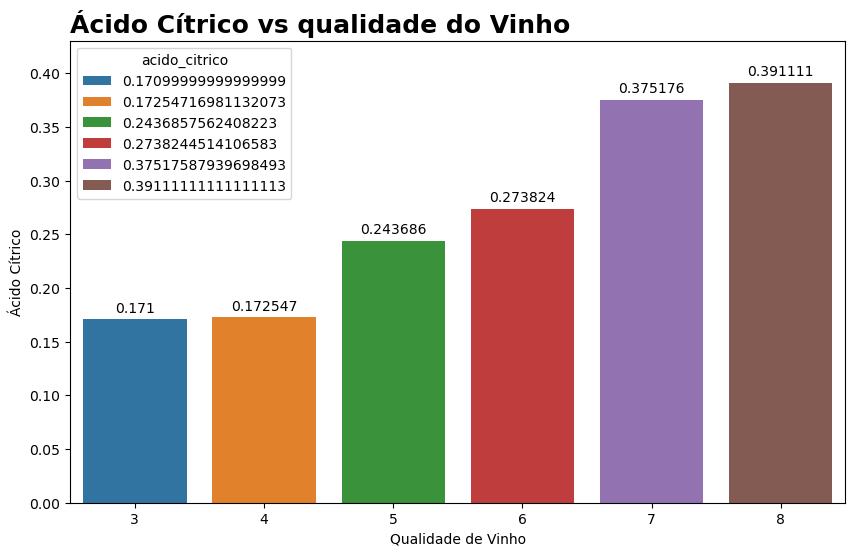

In [194]:
# Gráfico de barra Sulfato / Qualidade do Vinho 0.25 de correlação
grafo_barra(media_citrico_qualidade, media_citrico_qualidade.index, media_citrico_qualidade['acido_citrico'], media_citrico_qualidade['acido_citrico'],titulo='Ácido Cítrico vs qualidade do Vinho', ylabel='Ácido Cítrico', xlabel='Qualidade de Vinho')

#### Como os gráfico das médias do sulfitos e ácido cítrico vs qualidade nos mostra que também são diretamente proporcionais a qualidade do vinho.
#### Vamos observar a relações entres algumas váriáveis para que possamos dar continuidade e escolhermos qual tipo de modelo nos ajudará, nas previsões de qualidade para nosso futuro vinho.

#### Relação entre acidez volátil e teor alcóolico

# **Classificação Geral de Correlação de Pearson:**  
**Valor da Correlação(r)**----**Intensidade**-----------**Direção**  
-0,70 a -1,00--------------------Forte----------------Negativa    
-0,39 a -0,69---------------Moderada a fraca----------Negativa    
-0,20 a -0,38--------------------Fraca----------------Negativa    
-0,19 a +0,19---------------Praticamente nula----------Neutra    

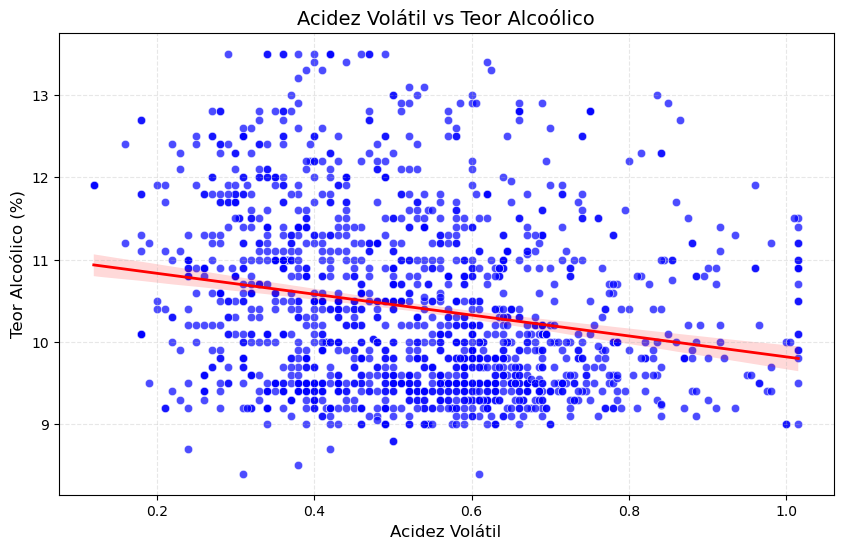

In [195]:
# Relação entre acidez volátil e teor alcóolico
grafo_scatterplot(df, df['acidez_volatil'], df['alcool'], titulo='Acidez Volátil vs Teor Alcoólico', xlabel='Acidez Volátil', ylabel='Teor Alcoólico (%)')

In [196]:
# Teste correlação de Pearson
corr_alcool_acidez_volatil = df[['alcool', 'acidez_volatil']].corr('pearson', numeric_only=True)
corr_alcool_acidez_volatil

,alcool,acidez_volatil
alcool,1.000000,-0.209385
acidez_volatil,-0.209385,1.000000


#### Temos um acúmulo entre a acidez volátil e o teor alcóolico o que podemos observar que não conseguimos considerar se o teor alcóolico irá ser maior ou menor se a acidez volátil aumentar.

#### Relação entre acidez volátil e qualidade do vinho

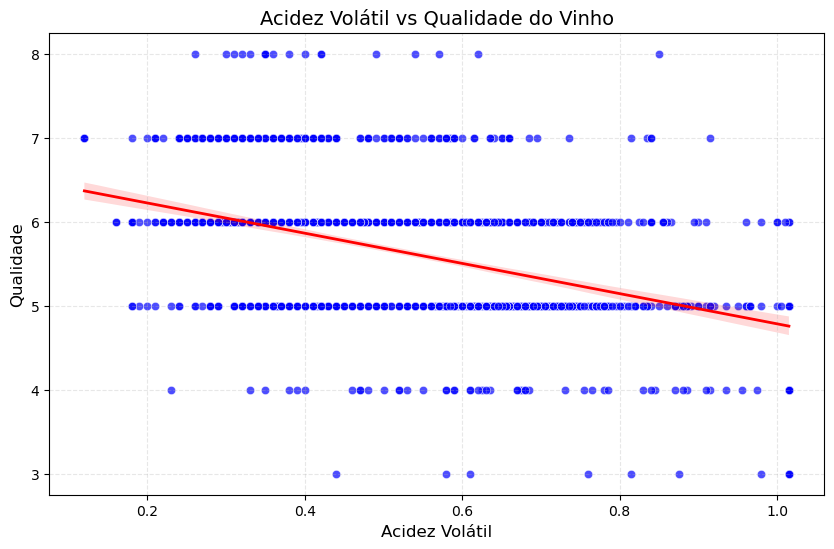

In [197]:
# Relação entre acidez volátil e teor qualidade do vinho
grafo_scatterplot(df, df['acidez_volatil'], df['qualidade'], titulo='Acidez Volátil vs Qualidade do Vinho', xlabel='Acidez Volátil', ylabel='Qualidade')

In [198]:
# Teste correlação de Pearson
corr_acidez_volatil_qualidade = df[['acidez_volatil', 'qualidade']].corr('pearson', numeric_only=True)
corr_acidez_volatil_qualidade

,acidez_volatil,qualidade
acidez_volatil,1.000000,-0.387608
qualidade,-0.387608,1.000000


#### Para obtermos uma qualidade elevada, temos que buscar manter a acidez abaixo de 1.0.

#### Relação entre alcool e qualidade do vinho

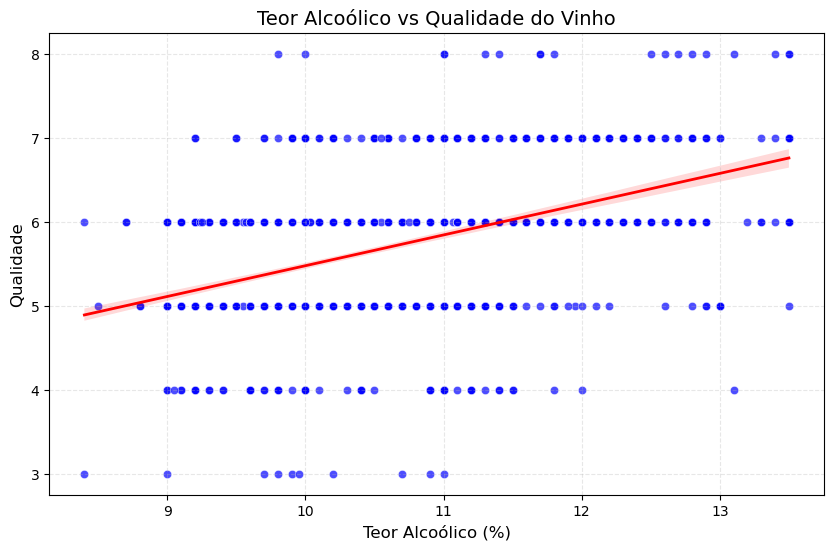

In [199]:
# Relação entre teor alcóolico vs qualidade do vinho
grafo_scatterplot(df, df['alcool'], df['qualidade'], titulo='Teor Alcoólico vs Qualidade do Vinho', xlabel='Teor Alcoólico (%)', ylabel='Qualidade')

In [200]:
# Teste correlação de Pearson
corr_alcool_acidez_qualidade = df[['alcool', 'qualidade']].corr('pearson', numeric_only=True)
corr_alcool_acidez_qualidade

,alcool,qualidade
alcool,1.000000,0.478556
qualidade,0.478556,1.000000


#### O teor alcoólico impacta diretamente a qualidade do vinho, mais nosso dever é manter esse teor alcoólico até 13% para não influênciar no sabor do vinho.

#### Relação entre sulfatos e qualidade do vinho

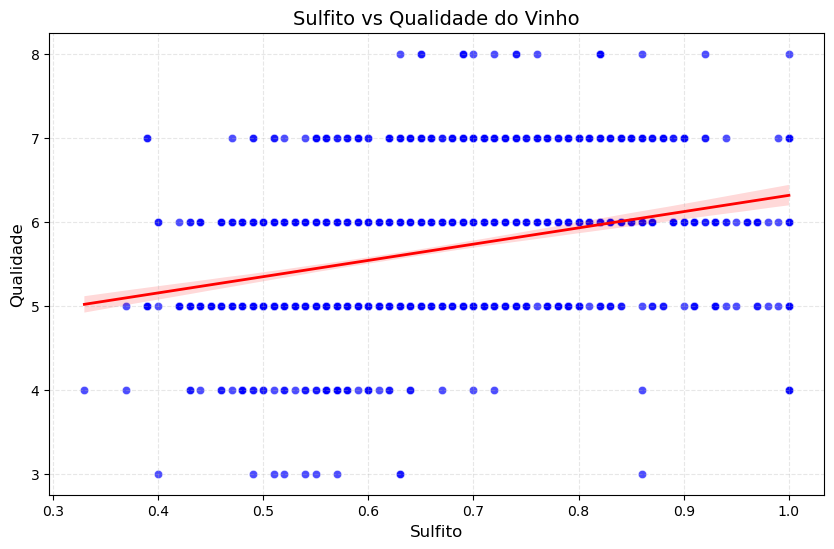

In [201]:
# Relação entre sulfato vs qualidade do vinho
grafo_scatterplot(df, df['sulfitos'], df['qualidade'], titulo='Sulfito vs Qualidade do Vinho', xlabel='Sulfito', ylabel='Qualidade')

In [202]:
# Teste correlação de Pearson
corr_sulfatos_qualidade = df[['sulfitos', 'qualidade']].corr('pearson', numeric_only=True)
corr_sulfatos_qualidade

,sulfitos,qualidade
sulfitos,1.00000,0.32871
qualidade,0.32871,1.00000


#### Nossa meta é utilizar o mínimo de agrotóxicos em nossa cultivação, mantendo o sulfito abaixo de 1.0 priorizando processos mais naturais.

#### Relação entre ácido cítrico e qualidade do vinho

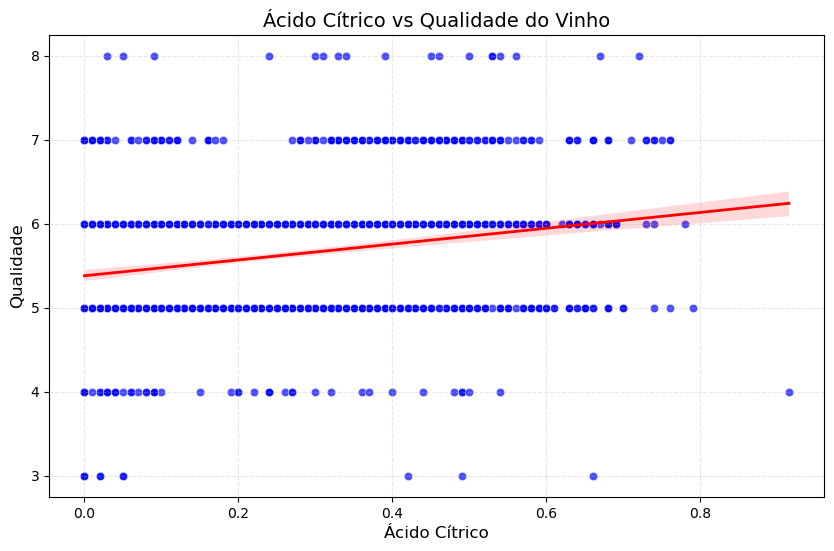

In [203]:
# Relação entre ácido cítrico vs qualidade do vinho
grafo_scatterplot(df, df['acido_citrico'], df['qualidade'], titulo='Ácido Cítrico vs Qualidade do Vinho', xlabel='Ácido Cítrico', ylabel='Qualidade')

In [205]:
# Teste correlação de Pearson
corr_acido_citrico_qualidade = df[['acido_citrico', 'qualidade']].corr('pearson', numeric_only=True)
corr_acido_citrico_qualidade

,acido_citrico,qualidade
acido_citrico,1.000000,0.227144
qualidade,0.227144,1.000000


#### Estamos trabalhando para manter o ácido cítrico bem abaixo de 0.5g/l e também trabalhando para deixar o ph baixo para manter a longevidade de nosso vinho.

# Verificando se os dados estão balanceados

In [206]:
df['qualidade'].value_counts().sort_values()

qualidade
3     10
8     18
4     53
7    199
6    638
5    681
Name: count, dtype: int64

In [209]:
# Para que os dados sejam balanceados eles precisam ser inteiros não podem ser continuos
df['qualidade'] = df.qualidade.astype(int)
df.qualidade.sort_values()

690     3
832     3
517     3
899     3
459     3
       ..
1090    8
1120    8
588     8
828     8
1549    8
Name: qualidade, Length: 1599, dtype: int64

In [210]:
df[df['qualidade'] < 5]

,acidez_fixa,acidez_volatil,acido_citrico,acucar_residual,cloretos,dioxido_enxofre_livre,dioxido_enxofre_total,densidade,ph,sulfitos,alcool,qualidade
18,7.4,0.590,0.08,3.65,0.086,6.0,29.0,0.99740,3.380,0.50,9.00,4
38,5.7,1.015,0.09,1.50,0.120,7.0,19.0,0.99400,3.500,0.48,9.80,4
41,8.8,0.610,0.30,2.80,0.088,17.0,46.0,0.99760,3.260,0.51,9.30,4
45,4.6,0.520,0.15,2.10,0.054,8.0,65.0,0.99340,3.685,0.56,13.10,4
73,8.3,0.675,0.26,2.10,0.084,11.0,43.0,0.99760,3.310,0.53,9.20,4
...,...,...,...,...,...,...,...,...,...,...,...,...
1480,5.6,0.620,0.03,1.50,0.080,6.0,13.0,0.99498,3.660,0.62,10.10,4
1482,7.2,0.580,0.54,2.10,0.114,3.0,9.0,0.99719,3.330,0.57,10.30,4
1484,6.8,0.910,0.06,2.00,0.060,4.0,11.0,0.99592,3.530,0.64,10.90,4
1505,6.7,0.760,0.02,1.80,0.078,6.0,12.0,0.99600,3.550,0.63,9.95,3


In [211]:
qual_baixa = (len(df[df['qualidade'] < 5]))
qual_media = (len(df[df['qualidade'] > 4])) & (len(df[df['qualidade'] < 7]))
qual_alta = (len(df[df['qualidade'] > 6]))

In [212]:
print(f'Relação do Balanceamento dos dados')
print('Qualidade baixo: ', round((qual_baixa / df.shape[0]) * 100, 2),'%')
print('Qualidade média: ', round((qual_media / df.shape[0]) * 100, 2),'%')
print('Qualidade alta: ', round((qual_alta / df.shape[0]) * 100, 2),'%')


Relação do Balanceamento dos dados
Qualidade baixo:  3.94 %
Qualidade média:  64.04 %
Qualidade alta:  13.57 %


#### Nossos dados estão com um nível de desbalanceamento alto entre as qualidades, isso irá prejudicar nossos modelos na hora que formos efetuar o treinamento.  
#### Então irei utilizar uma técnica de balanceamento o **SMOTEENN** que irá unir o **SMOTE** que para gerar dados sintéticos com base nos dados reais para classe de menor número e a Undersampling para remover problemas com as duas classes, analisando os dados vizinhos mais próximos, assim ele irá remover os pontos onde estão diferentes de seu dados vizinhos, dessa maneira a fronteira entre uma classe e outra ficará limpa.
#### Assim conseguiremos balancear nossos dados para que nossos modelos não fiquem enviezados.

In [213]:
df = balance_dataframe(df=df, target_column='qualidade', method='smoteenn')

Distribuição original: Counter({5: 681, 6: 638, 7: 199, 4: 53, 8: 18, 3: 10})
Distribuição após balanceamento: Counter({3: 603, 8: 544, 7: 510, 4: 496, 5: 165, 6: 108})


In [215]:
df['qualidade'].value_counts().sort_index

<bound method Series.sort_index of qualidade
3    603
8    544
7    510
4    496
5    165
6    108
Name: count, dtype: int64>

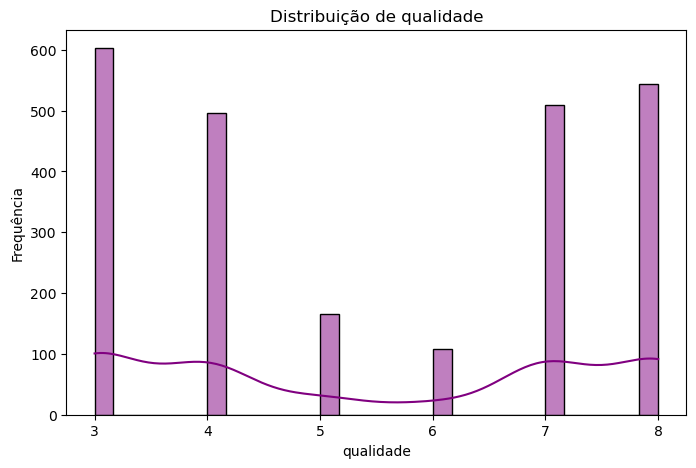

In [216]:
# Plotagem após o balanceamento
grafo_distribuicao(df, 'qualidade')

#### Salvando os dados balanceados para teste dos modelos

In [217]:
# Salva dados processados
df.to_csv(f'{DATA_PROCESSED}/modelo_ml.csv', index=False)

Conclusão:

A correlação não implica que **mais álcool** = **melhor qualidade**, apenas que há uma tendência nos dados analisados.

- Como observado nossos dados estavam desbalanceados e isso irá implicar diretamente no treinamento e previsão de nosso modelo de machine learning.

- Então fiz o balanceamento dos dados assim os modelos executarão seus treinamentos da maneira mais confiavél sem enviezamento nos dados.

- Embora exista uma relação moderada (r = 0,48) entre teor alcoólico e qualidade, isso não significa que aumentar o álcool melhora o vinho automaticamente. 

- Recomenda-se analisar outras variáveis (como tipo de uva, região climática ou técnicas de vinificação) para entender completamente os drivers de qualidade.

- Iniciarei a criação dos algortimos com as **co-variáveis** originais do dataset e caso não consiga alcançar predições com valores satisfatórios de retorno para alcançarmos a qualidade necessária para criação de vinho. Então irei buscar **co-variáveis** externas para alcançar os objetivos.